In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import sys
!{sys.executable} -m pip install missingpy
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [2]:
train = pd.read_csv('train.csv')

In [3]:
IndependentVariables = ["age","BMI","heart rate", "Systolic blood pressure", "Diastolic blood pressure", "Respiratory rate","temperature","SP O2","Urine output","hematocrit","RBC","MCH","MCHC","MCV","RDW","Leucocyte","Platelets",\
                             "Neutrophils","Basophils","Lymphocyte" ,"PT","INR","NT-proBNP","Creatine kinase","Creatinine","Urea nitrogen","glucose","Blood potassium","Blood sodium","Blood calcium","Chloride","Anion gap",\
                              "Magnesium ion","PH","Bicarbonate","Lactic acid","PCO2","EF"]
DependentVariables = ["hypertensive","atrialfibrillation","CHD with no MI","diabetes","deficiencyanemias","depression","Hyperlipemia","Renal failure","COPD"]

## EDA

### Count Plot

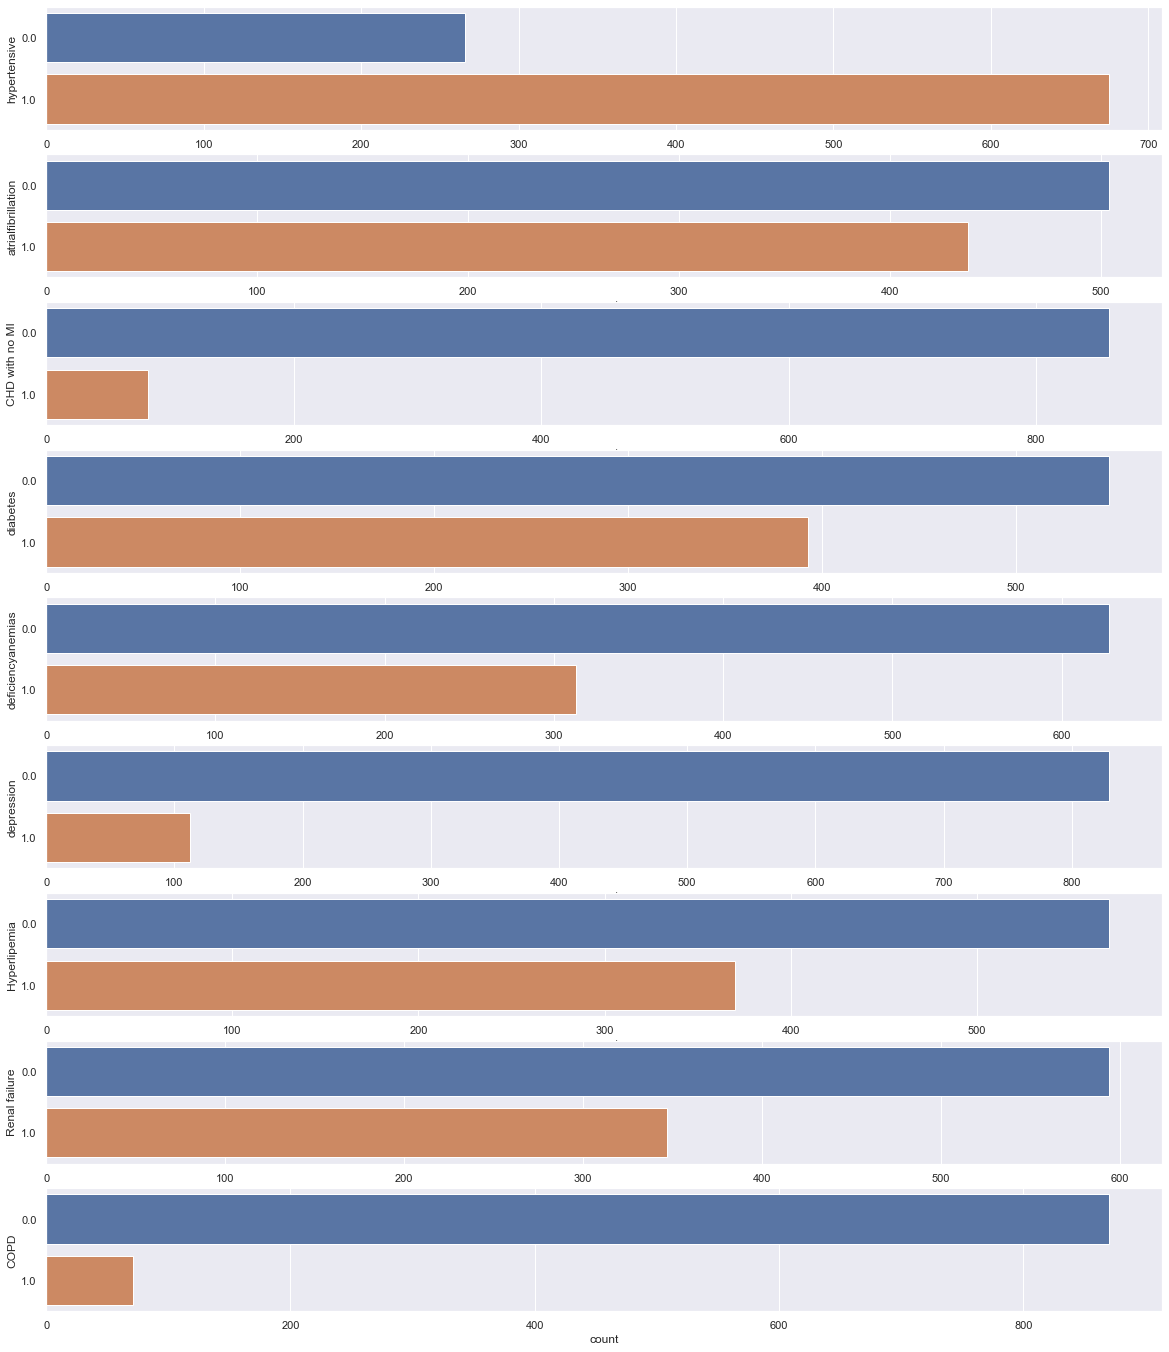

In [4]:
f, axes = plt.subplots(9, 1, figsize=(20, 24))


count = 0
for var in DependentVariables:
    sb.countplot(y=var, data = train, ax=axes[count])
    count += 1

Analysis:
Make sense for the values not to be equal the people in the data can have multiple diseases or none, and they did not  specifically chose people with certain diseases.
Some of the diseases still have significant amount of data for both the yes and no data

### Boxplot

In [5]:
def boxplotfunction(disease,independentvariable):
    f, axes = plt.subplots(38, 1, figsize=(20, 200))


    count = 0
    for var in independentvariable:
        sb.boxplot(x = var, y = disease, data = train, orient = "h", ax = axes[count]).set(title=var)
        count += 1

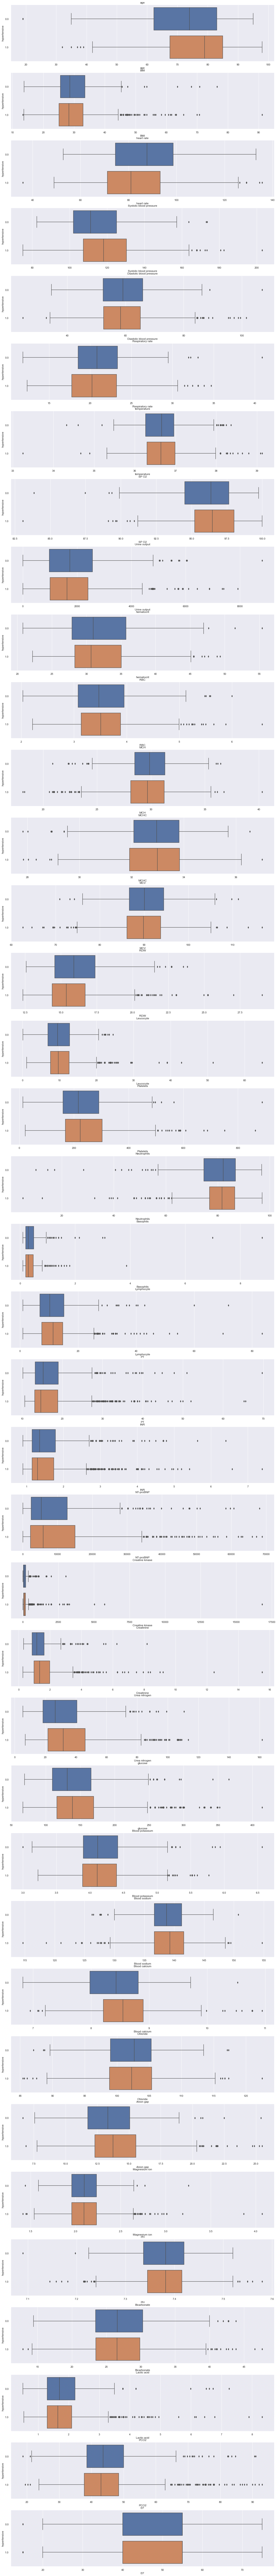

In [6]:
boxplotfunction("hypertensive", IndependentVariables)

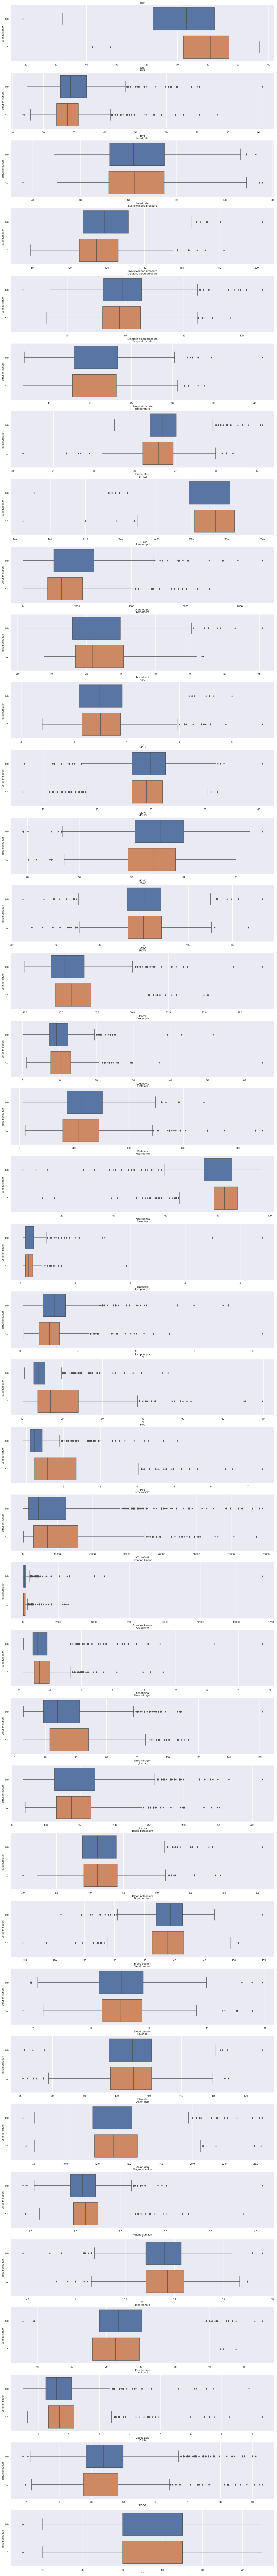

In [7]:
boxplotfunction("atrialfibrillation", IndependentVariables)

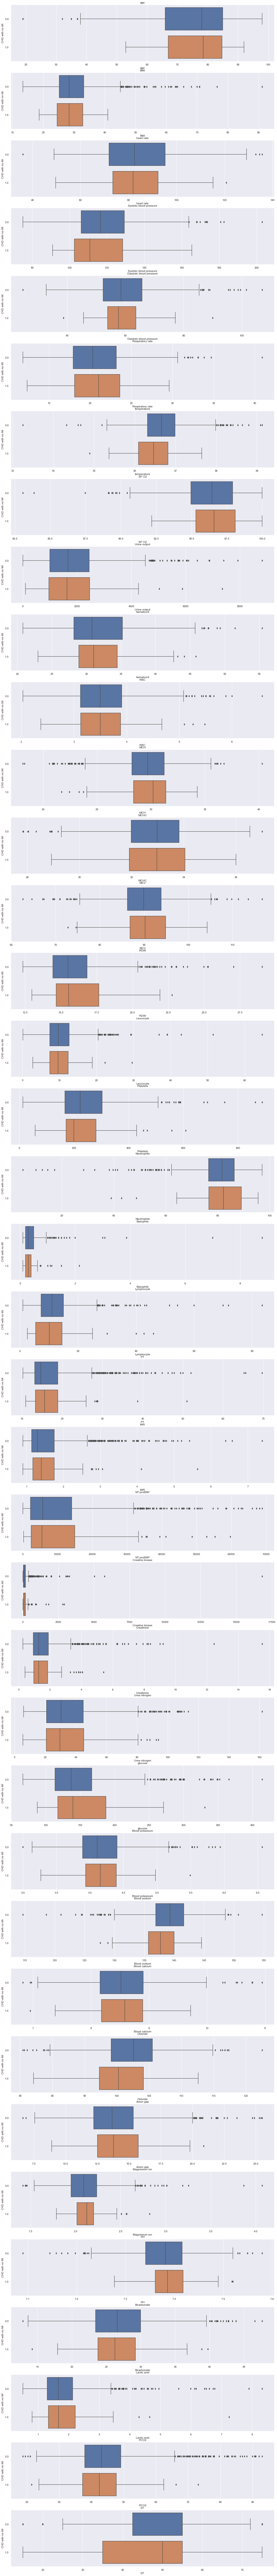

In [8]:
boxplotfunction("CHD with no MI", IndependentVariables)

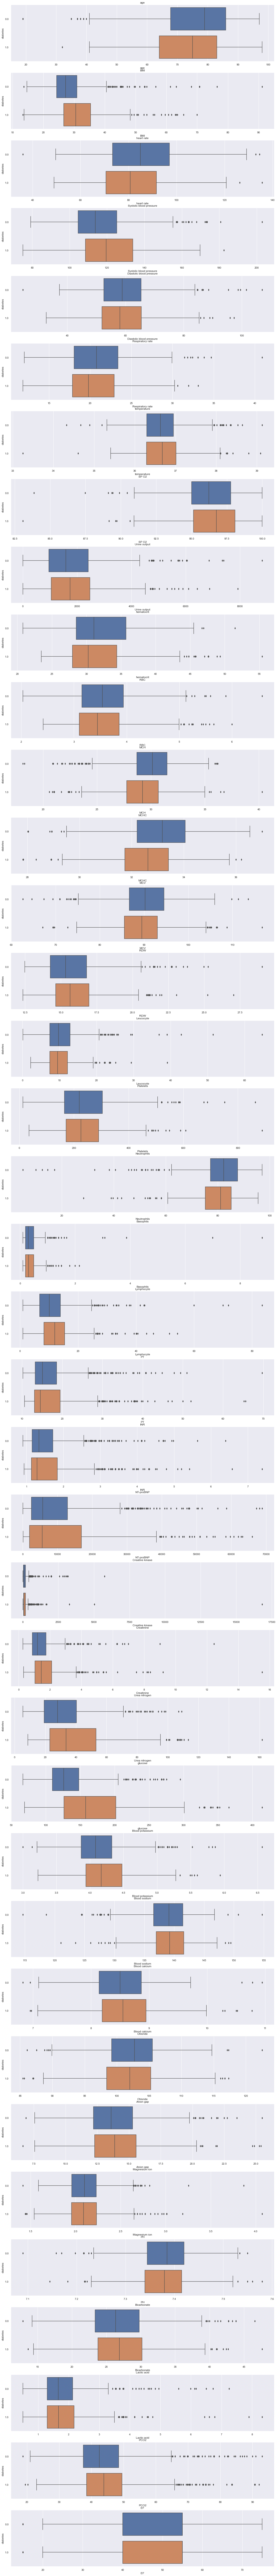

In [9]:
boxplotfunction("diabetes", IndependentVariables)

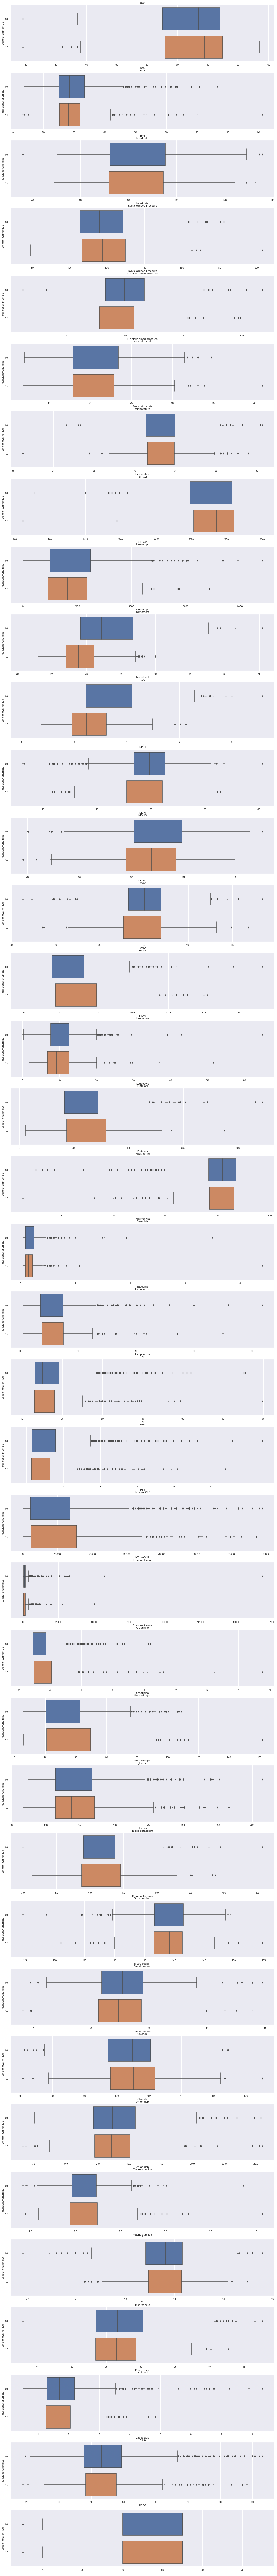

In [10]:
boxplotfunction("deficiencyanemias", IndependentVariables)

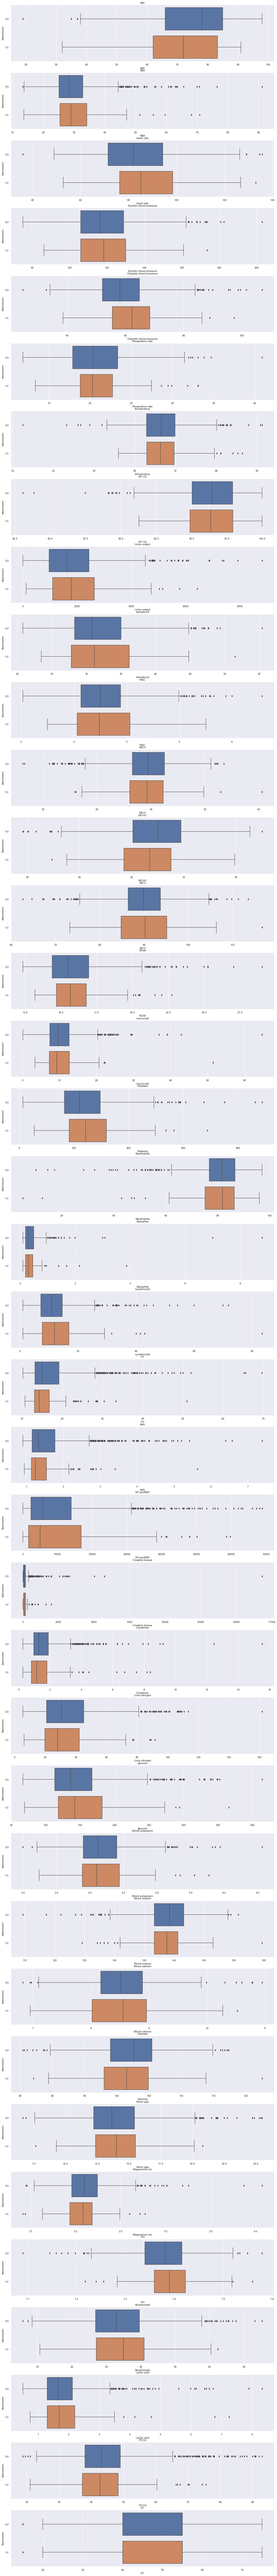

In [11]:
boxplotfunction("depression", IndependentVariables)

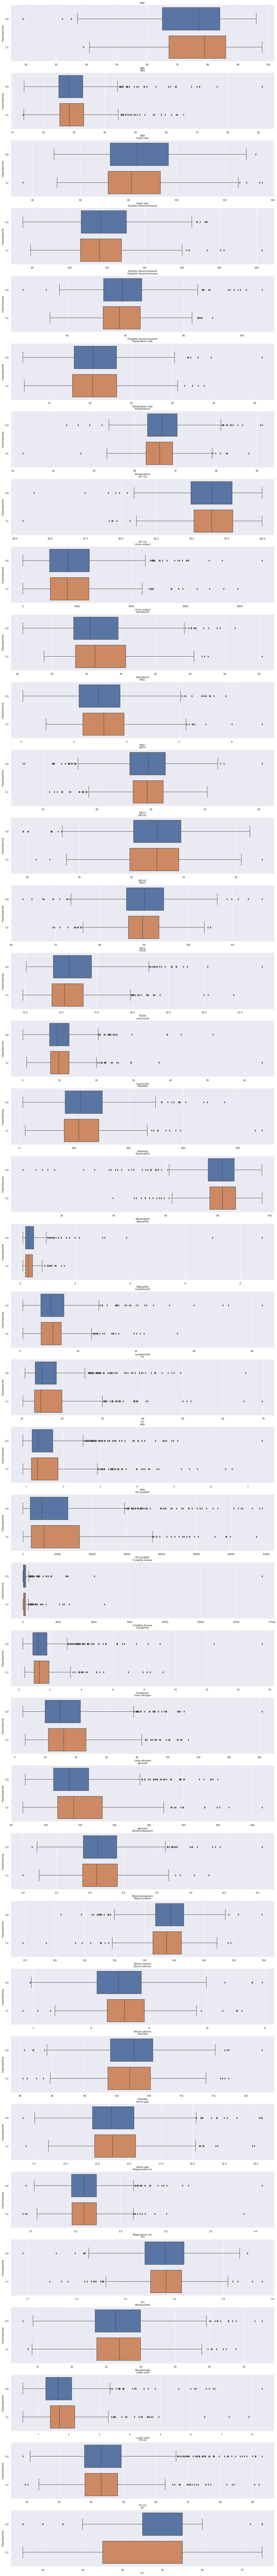

In [12]:
boxplotfunction("Hyperlipemia", IndependentVariables)

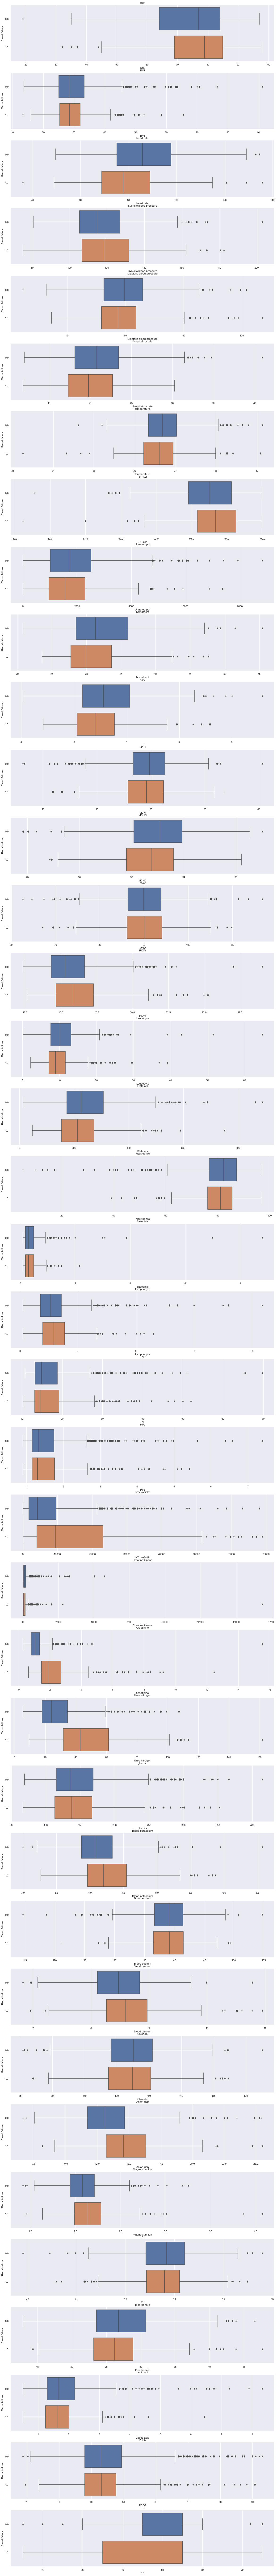

In [13]:
boxplotfunction("Renal failure", IndependentVariables)

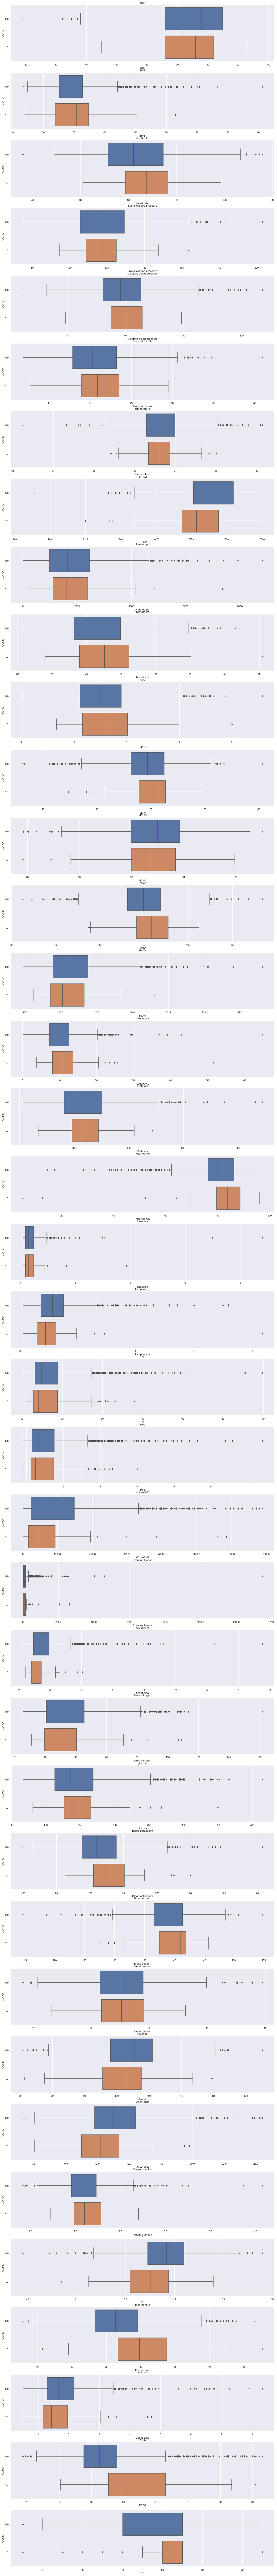

In [14]:
boxplotfunction("COPD", IndependentVariables)

Analysis:
All the variables are quite similar and does not have significant difference between whether or not if someone got the disease.
Boxplot not visually to see which variables play a significant factor in whether someone got the disease.
Hence maybe a heatmap showing, each variable correlation value can tell a clearer picture

### Heatmap

In [15]:
def heatmap(disease,count):
    y_train = train[disease]
    X_train = train.drop(columns = DependentVariables)
    #f = plt.figure(figsize=(4, 10))
    trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)
    king=abs(trainDF.corr())
    sb.heatmap(king[[disease]], vmin = 0, vmax = 1, annot = True, cmap="YlOrBr", fmt = ".2f",ax=axes[count])

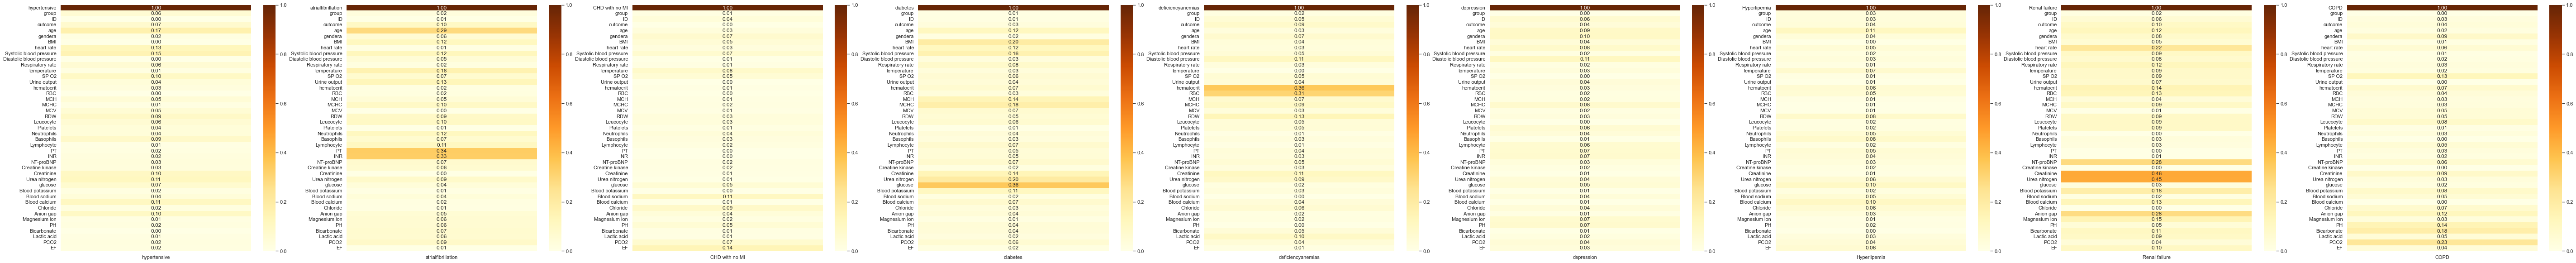

In [16]:
f, axes = plt.subplots(1, 9, figsize=(100, 10))

count = 0
for var in DependentVariables:
    heatmap(var,count)
    count += 1

Analysis:
    
    Able to see which variables have a more significant impact on the diseases.
    Most of the variables have have small correlation values of almost 0.
    Some diseases have a few variables with correlation values more than 0.3.
    However, variables with correlation values ~0.3 is not very strong and too few of them to single them out for machine
    learning.
    Renal Failure do have 2 variables(Creatine and Glucose with correlation value of >0.4)
    Hence, we decide to use all the available variables for machine learning.
    Since we have so many variables, a random forest would be a good model to see if these variables can determine whether 
    or not someone would have any of these 9 diseases with data of these variables